  Q1-A

In [1]:

from skimage import exposure
from skimage.exposure import match_histograms
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2


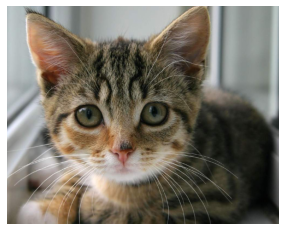

In [2]:
image = cv2.imread("Image1.jpeg")


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Q1-B

In [3]:
image_rgb.shape

(800, 1000, 3)

In [4]:
grayscale = (0.33* image_rgb[:,:,0])+(0.33* image_rgb[:,:,0])+(0.33* image_rgb[:,:,0])

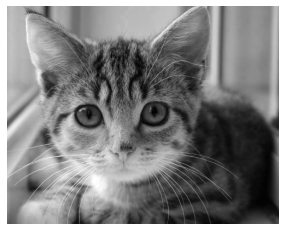

In [5]:
plt.imshow(grayscale, cmap = 'gray')
plt.axis('off')
plt.show()

  Q1-C

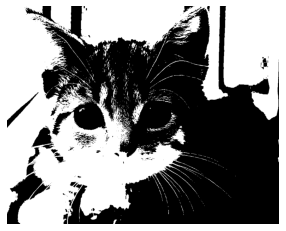

In [6]:
(row, col) = grayscale.shape[0:2]

binary_image = grayscale.copy()
for i in range(row):
  for j in range(col):
    if binary_image[i][j] >= 128:
      binary_image[i][j] = 1
    else:
      binary_image[i][j] = 0

plt.imshow(binary_image,cmap="gray")
plt.axis('off')
plt.show()

Q1-D

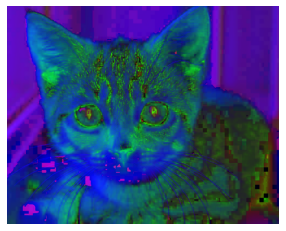

In [7]:
r = image_rgb[:,:,0]
g = image_rgb[:,:,1]
b = image_rgb[:,:,2]

r = r / 255
g = g / 255
b = b / 255

H = np.zeros((row, col))
S = np.zeros((row, col))
V = np.zeros((row, col))

cmax = np.zeros((row, col))
cmin = np.zeros((row, col))

for i in range(row):
  for j in range(col):
    red = r[i][j]
    green = g[i][j]
    blue = b[i][j]

    cmax[i][j] = max(image_rgb[i][j])
    cmin[i][j] = min(image_rgb[i][j])

    maxim = max(red, green, blue)
    minim = min(red, green, blue)

    cmax[i][j] = maxim
    cmin[i][j] = minim

    if(maxim - minim == 0):
      H[i][j] = 0
    elif(maxim == red):
      H[i][j] = 60 * (((green - blue)/(maxim-minim))%6)
    elif(maxim == green):
      H[i][j] = 60 * ((blue - red)/(maxim - minim) + 2)
    elif(maxim == blue):
      H[i][j] = 60 * ((red - green)/(maxim - minim) + 4)

for i in range(row):
  for j in range(col):
    if(cmax[i][j]==0):
      S[i][j] = 0
    else:
      S[i][j] = (cmax[i][j]-cmin[i][j]) / cmax[i][j]


V = cmax


image_hsv = np.zeros((row, col, 3)).astype(np.uint8)
image_hsv[:,:,0]=(H / 2).astype(np.uint8)
image_hsv[:,:,1]=(S*255).astype(np.uint8)
image_hsv[:,:,2]=(V*255).astype(np.uint8)


plt.imshow(image_hsv)
plt.axis('off')
plt.show()

Q1-E

In [8]:
tmp = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


plt.imshow(tmp)
plt.axis('off')
plt.show()

Q1-F

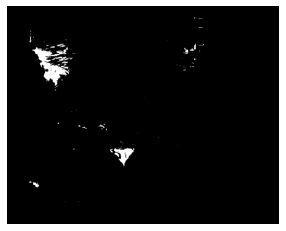

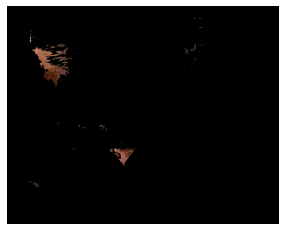

In [9]:
result = image_rgb.copy()

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

lower_mask = cv2.inRange(image_hsv, lower1, upper1)
upper_mask = cv2.inRange(image_hsv, lower2, upper2)

full_mask = lower_mask + upper_mask
result = cv2.bitwise_and(result, result, mask=full_mask)

plt.imshow(full_mask, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(result)
plt.axis('off')
plt.show()

چون رنگ قرمز در دو طرف بازه‌ی رنگ‌ها پخش شده است (h=0 و h=179 هر دو یک رنگند)


پس باید هر دو طرف را لحاظ کنیم. از طرفی 
s
را حداقل ۱۰۰ گرفتیم تا درصد خلوصی داشته باشد و
v
را نیز حداقل ۲۰ گرفتیم تا کمی برایتنس داشته باشیم. سپس ماسک را روی تصویر اعمال میکنیم.

Q2

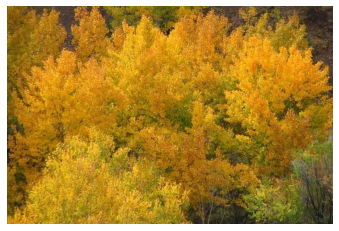

In [10]:
image2_1 = cv2.imread("Image2.1.jpg")
image2_2 = cv2.imread("Image2.2.jpg")


rgb_2_1 = cv2.cvtColor(image2_1, cv2.COLOR_BGR2RGB)
rgb_2_2 = cv2.cvtColor(image2_2, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_2_1)
plt.axis('off')
plt.show()
plt.imshow(rgb_2_2)
plt.axis('off')
plt.show()

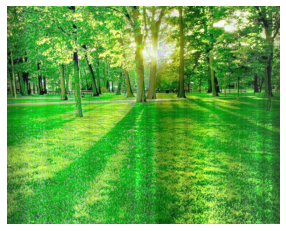

In [11]:
matched = match_histograms(rgb_2_1, rgb_2_2 ,channel_axis=True) 

plt.imshow(matched)
plt.axis('off')
plt.show()

Q3-A

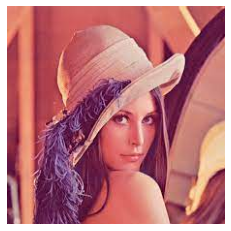

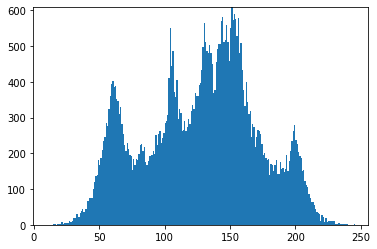

In [12]:
image3 = cv2.imread("Image3.jpg")

rgb_3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_3)
plt.axis('off')
plt.show()



vals = image3.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.ylim([0, np.max(counts)])
plt.show()

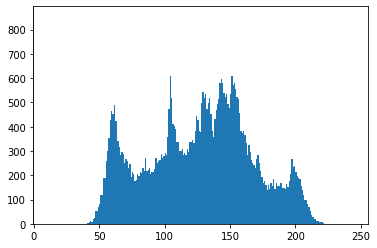

In [13]:
row, col= image3.shape[0:2]
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
img_new1 = np.zeros((row, col , 3)) 
  
img = rgb_3
for i in range(1, row-1): 
    for j in range(1, col-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        
    
        img_new1[i, j]= temp 
          
img_new1 = img_new1.astype(np.uint8) 


plt.imshow(img_new1)
plt.axis('off')
plt.show()


vals = img_new1.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.ylim([0, np.max(counts)])
plt.show()

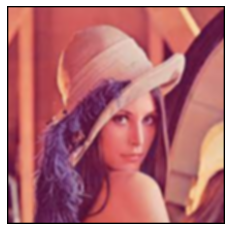

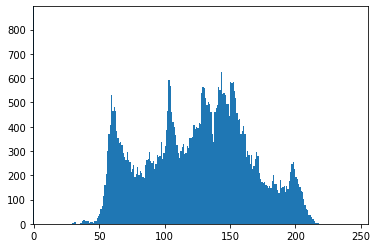

In [14]:
img = img_new1.copy()
img_new2 = np.zeros((row, col , 3)) 
for i in range(1, row-1): 
    for j in range(1, col-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        
    
        img_new2[i, j]= temp 
          
img_new2 = img_new2.astype(np.uint8) 


plt.imshow(img_new2)
plt.axis('off')
plt.show()



vals = img_new2.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.ylim([0, np.max(counts)])
plt.show()

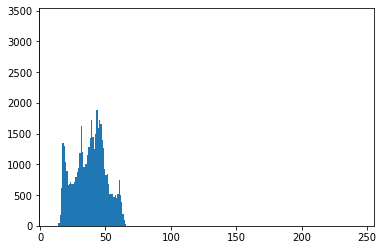

In [15]:
mask = np.ones([9, 9], dtype=int)
mask = mask / 81

img = rgb_3
img_new3 = np.zeros((row, col, 3))


for i in range(4, row - 4):
    for j in range(4, col - 4):
        temp = img[i - 2, j - 2] * mask[0, 0] + img[i - 2, j - 1] * mask[0, 1] + img[i - 2, j] * mask[0, 2] + img[i - 2, j + 1] * mask[0, 3] + img[i - 2, j + 2] * mask[0, 4]
        temp += img[i - 1, j - 2] * mask[1, 0] + img[i - 1, j - 1] * mask[1, 1] + img[i - 1, j] * mask[1, 2] + img[i - 1, j + 1] * mask[1, 3] + img[i - 1, j + 2] * mask[1, 4]
        temp += img[i, j - 2] * mask[2, 0] + img[i, j - 1] * mask[2, 1] + img[i, j] * mask[2, 2] + img[i, j + 1] * mask[2, 3] + img[i, j + 2] * mask[2, 4]
        temp += img[i + 1, j - 2] * mask[3, 0] + img[i + 1, j - 1] * mask[3, 1] + img[i + 1, j] * mask[3, 2] + img[i + 1, j + 1] * mask[3, 3] + img[i + 1, j + 2] * mask[3, 4]
        temp += img[i + 2, j - 2] * mask[4, 0] + img[i + 2, j - 1] * mask[4, 1] + img[i + 2, j] * mask[4, 2] + img[i + 2, j + 1] * mask[4, 3] + img[i + 2, j + 2] * mask[4, 4]
        



        img_new3[i, j] = temp

img_new3 = img_new3.astype(np.uint8)


plt.imshow(img_new3)
plt.axis('off')
plt.show()



vals = img_new3.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.ylim([0, np.max(counts)])
plt.show()

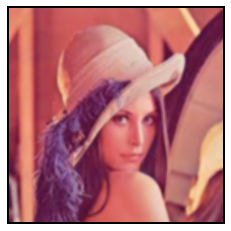

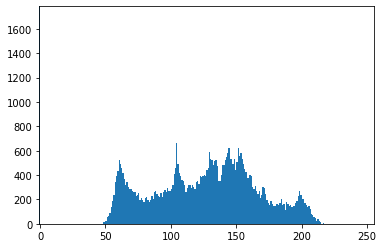

In [16]:
mask = np.array([[1,1,2,1,1],[1,2,4,2,1],[2,4,8,4,2],[1,2,4,2,1],[1,1,2,1,1]])
mask = mask / 52
   
img_new4 = np.zeros((row, col , 3)) 
  
img = rgb_3
for i in range(2, row-2): 
    for j in range(2, col-2):
        temp = img[i-2, j-2]*mask[0, 0] +  img[i-2, j-1]*mask[0, 1] +  img[i-2, j]*mask[0,2] +  img[i-2, j+1]*mask[0,3] +  img[i-2, j+2]*mask[0,4]
        temp += img[i-1, j-2]*mask[1, 0] +  img[i-1, j-1]*mask[1, 1] +  img[i-1, j]*mask[1,2] +  img[i-1, j+1]*mask[1,3] +  img[i-1, j+2]*mask[1,4]
        temp += img[i, j-2]*mask[2, 0] +  img[i, j-1]*mask[2, 1] +  img[i, j]*mask[2,2] +  img[i, j+1]*mask[2,3] +  img[i, j+2]*mask[2,4]
        temp += img[i+1, j-2]*mask[3, 0] +  img[i+1, j-1]*mask[3, 1] +  img[i+1, j]*mask[3,2] +  img[i+1, j+1]*mask[3,3] +  img[i+1, j+2]*mask[3,4]
        temp += img[i+2, j-2]*mask[4, 0] +  img[i+2, j-1]*mask[4, 1] +  img[i+2, j]*mask[4,2] +  img[i+2, j+1]*mask[4,3] +  img[i+2, j+2]*mask[4,4]

        
        img_new4[i, j]= temp 
          
img_new4 = img_new4.astype(np.uint8) 


plt.imshow(img_new4)
plt.axis('off')
plt.show()


vals = img_new4.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.ylim([0, np.max(counts)])
plt.show()

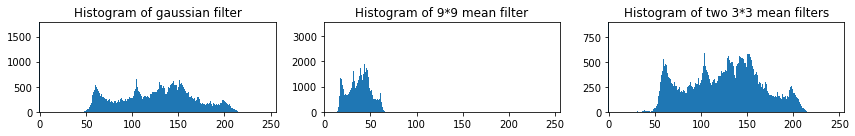

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 2))

vals_img_new4 = img_new4.mean(axis=2).flatten()
counts_img_new4, bins_img_new4 = np.histogram(vals_img_new4, range(257))
axes[0].bar(bins_img_new4[:-1] - 0.5, counts_img_new4, width=1, edgecolor='none')
axes[0].set_xlim([-0.5, 255.5])
axes[0].set_ylim([0, np.max(counts_img_new4)])
axes[0].set_title('Histogram of gaussian filter')

vals_img_new3 = img_new3.mean(axis=2).flatten()
counts_img_new3, bins_img_new3 = np.histogram(vals_img_new3, range(257))
axes[1].bar(bins_img_new3[:-1] - 0.5, counts_img_new3, width=1, edgecolor='none')
axes[1].set_xlim([-0.5, 255.5])
axes[1].set_ylim([0, np.max(counts_img_new3)])
axes[1].set_title('Histogram of 9*9 mean filter')

vals_img_new2 = img_new2.mean(axis=2).flatten()
counts_img_new2, bins_img_new2 = np.histogram(vals_img_new2, range(257))
axes[2].bar(bins_img_new2[:-1] - 0.5, counts_img_new2, width=1, edgecolor='none')
axes[2].set_xlim([-0.5, 255.5])
axes[2].set_ylim([0, np.max(counts_img_new2)])
axes[2].set_title('Histogram of two 3*3 mean filters')

plt.tight_layout()
plt.show()

the gaussian filter is approximately the same as (I).

Q3-B

the gaussian filter is approximately the same as I.

Q3-C

In [18]:
from math import log10, sqrt 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
print('psnr of (III) vs (I) is ', PSNR(img_new2, img_new4))
print('psnr of (II) vs (I) is ', PSNR(img_new2, img_new3))

psnr of (III) vs (I) is  43.68433727552908
psnr of (II) vs (I) is  27.88115860625114


this shows that the 9 by 9 guassian filter is more similar to the two 3 by 3 filters

Q4

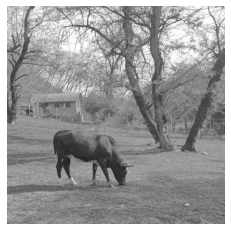

In [19]:
image4 = cv2.imread("Image4.jpeg")

rgb_4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_4)
plt.axis('off')
plt.show()

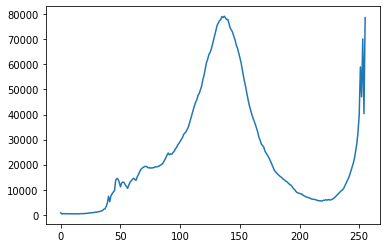

In [20]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1
    
    return histogram


vals = image4.mean(axis=2).flatten()
vals = vals.astype(np.uint8)
hist = get_histogram(vals, 256)
plt.plot(hist)

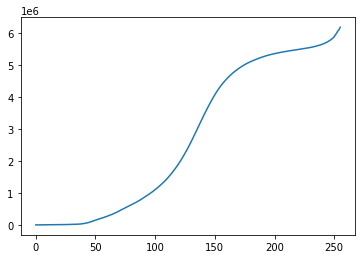

In [21]:
def cdf(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

cs = cdf(hist)
plt.plot(cs)

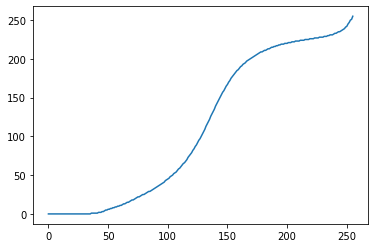

In [22]:
cs = (cs - cs.min()) * 255 / (cs.max() - cs.min())
cs = cs.astype('uint8')
plt.plot(cs)

In [23]:
new = cs[vals]
new = np.reshape(new, image4.shape[0:2])
new = cv2.cvtColor(new, cv2.COLOR_GRAY2RGB)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image4)

fig.add_subplot(1,2,2)
plt.imshow(new)

plt.show(block=True)

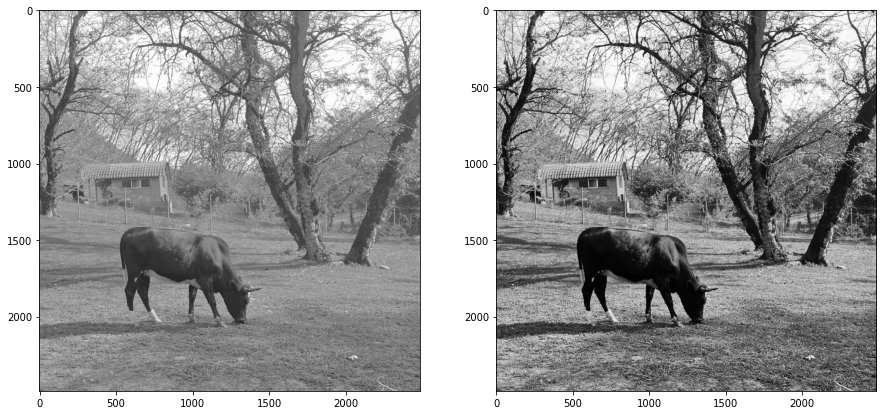

In [24]:
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray4) 

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image4)

fig.add_subplot(1,2,2)
plt.imshow(equ, cmap='gray')

plt.show(block=True)

In [25]:
print('psnr of my implementation: ', PSNR(image4, new))
print('psnr of  cv2 solution: ', PSNR(image4, cv2.cvtColor(equ, cv2.COLOR_GRAY2BGR)))


print('psnr of  my solution vs cv2 solution: ', PSNR(new, cv2.cvtColor(equ, cv2.COLOR_GRAY2BGR)))

psnr of my implementation:  27.8239441832862
psnr of  cv2 solution:  27.842702478466627
psnr of  my solution vs cv2 solution:  51.32444370379762


my solution had the same amount of similarity to the original image as the cv2 solution had.

also, the psnr of my solution to cv2 is very high (51) whch indicates high similarity.

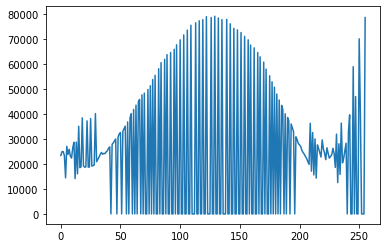

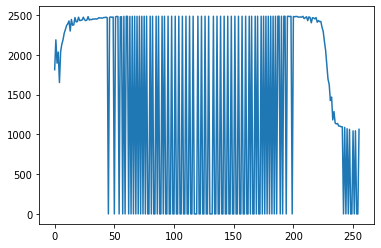

In [26]:
vals1 = new.mean(axis=2).flatten()
vals1 = vals1.astype(np.uint8)
hist1 = get_histogram(vals1, 256)
plt.plot(hist1)
plt.show()


vals2 = equ
vals2 = vals2.astype(np.uint8)
hist2 = get_histogram(vals2, 256)
plt.plot(hist2)
plt.show()

Q5

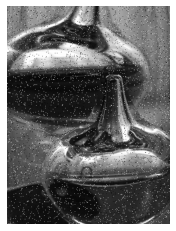

In [27]:
image5 = cv2.imread("Image5.jpg")

rgb_5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)


plt.imshow(rgb_5)
plt.axis('off')
plt.show()

In [28]:
image5.shape

(428, 320, 3)

median filter is the best way to reduce sal and pepper noise:

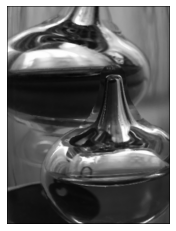

In [29]:
row, col= image5.shape[0:2]
  
denoised1 = np.zeros((row, col , 3)) 
  
img = rgb_5
for i in range(1, row-1): 
    for j in range(1, col-1):
        temp = []
        for k in range(-1, 2):
            for l in range(-1, 2):
                temp.append(img[i + k, j + l])
        median = np.median(temp, axis=0).astype(np.uint8)
        denoised1[i, j]= median 
          
denoised1 = denoised1.astype(np.uint8) 


plt.imshow(denoised1)
plt.axis('off')
plt.show()


Q6

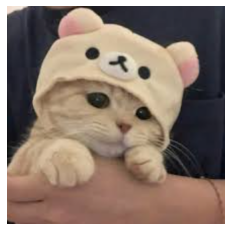

In [38]:
kitty = cv2.imread("Q6_image_original.png")

rgbc = cv2.cvtColor(kitty, cv2.COLOR_BGR2RGB)

plt.imshow(rgbc)
plt.axis('off')
plt.show()

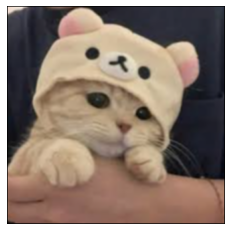

In [39]:
row, col= kitty.shape[0:2]
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
kittyy = np.zeros((row, col , 3)) 
  
img = rgbc
for i in range(1, row-1): 
    for j in range(1, col-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        
    
        kittyy[i, j]= temp 
          
kittyy = kittyy.astype(np.uint8) 


plt.imshow(kittyy)
plt.axis('off')
plt.show()

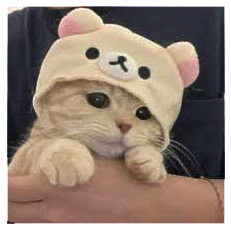

True

In [42]:
kitty = rgbc
r_kitty = kitty[:,:,0]
g_kitty = kitty[:,:,1]
b_kitty = kitty[:,:,2]
r_kittyy = kittyy[:,:,0]
g_kittyy = kittyy[:,:,1]
b_kittyy = kittyy[:,:,2]

strength = 4
high_pass = cv2.subtract(r_kitty, r_kittyy)
out1 = cv2.addWeighted(r_kitty, 1, high_pass, strength, 0)

high_pass = cv2.subtract(g_kitty, g_kittyy) 
out2 = cv2.addWeighted(g_kitty, 1, high_pass, strength, 0)

high_pass = cv2.subtract(b_kitty, b_kittyy)
out3 = cv2.addWeighted(b_kitty, 1, high_pass, strength, 0)


channels = [out1, out2, out3]
out = cv2.merge(channels)
plt.imshow(out)
plt.axis('off')
plt.show()

cv2.imwrite('Q6_image_modified.png', cv2.cvtColor(out, cv2.COLOR_RGB2BGR))

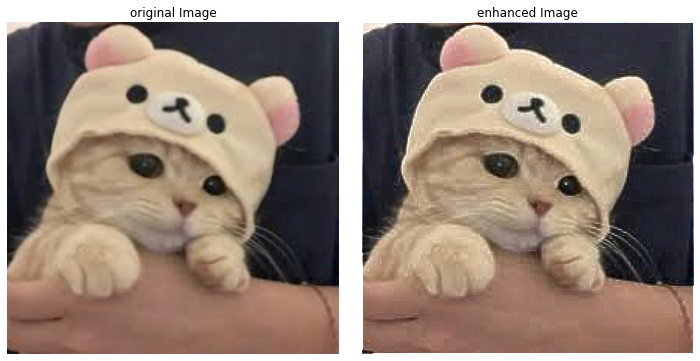

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rgbc)
axes[0].set_title('original Image')

axes[1].imshow(out)
axes[1].set_title('enhanced Image')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Q7

In [34]:
import re
from PIL import Image, ImageFilter

In [35]:
def stardetect(filepath):
  with open(filepath, 'r') as file:
      content = file.readlines()

  h, w, expected_number = map(int, content[0].split())

  image_data = np.zeros((h, w, 3), dtype=np.uint8)

  for i in range(h):
      values = re.findall(r'\((.*?)\)', content[i + 1])
      for j in range(w):
          r, g, b = map(int, values[j].split(','))
          image_data[i, j] = [r, g, b]
  image = Image.fromarray(image_data)

  bgr_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

  cv2.imwrite(filepath+'stars.png', bgr_image)
  row, col= bgr_image.shape[0:2]
    

  # median filter
  denoised = np.zeros((row, col , 3)) 
  img = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
  for i in range(1, row-1): 
      for j in range(1, col-1):
          temp = []
          for k in range(-1, 2):
              for l in range(-1, 2):
                  temp.append(img[i + k, j + l])
          median = np.median(temp, axis=0).astype(np.uint8)
          denoised[i, j]= median 
  denoised = denoised.astype(np.uint8) 

  #sharpen
  gaussian_3 = cv2.GaussianBlur(denoised, (0, 0), 2.0)
  unsharp_image = cv2.addWeighted(denoised, 4.0, gaussian_3, -4.0, 0)
    
  
  #denoise median again
  
  denoised = np.zeros((row, col , 3)) 
  img = unsharp_image
  for i in range(1, row-1): 
      for j in range(1, col-1):
          temp = []
          for k in range(-1, 2):
              for l in range(-1, 2):
                  temp.append(img[i + k, j + l])
          median = np.median(temp, axis=0).astype(np.uint8)
          denoised[i, j]= median 
  denoised = denoised.astype(np.uint8) 


  #making it binary
  grayscale = cv2.cvtColor(denoised, cv2.COLOR_RGB2GRAY)
  (row, col) = grayscale.shape[0:2]
  binary_image = grayscale.copy()
  for i in range(row):
    for j in range(col):
      if binary_image[i][j] >= 180:
        binary_image[i][j] = 1
      else:
        binary_image[i][j] = 0


  
  connectivity = 8
  output = cv2.connectedComponentsWithStats(binary_image, connectivity, cv2.CV_32S)

  num_labels = output[0]
  labels = output[1]
  stats = output[2]
  centroids = output[3]

  background_label = np.argmax(stats[:, cv2.CC_STAT_AREA])
  centroids = np.delete(centroids, (background_label), axis=0)
  stats = np.delete(stats, (background_label), axis=0)


  # Remove components with only one pixel
  new_labels = np.zeros_like(labels)
  new_centroids = []
  new_stats = []
  for label in range(0, num_labels - 1):
      area = stats[label, cv2.CC_STAT_AREA]
      if area > 1:
          new_labels[labels == label] = len(new_stats) + 1
          new_centroids.append(centroids[label])
          new_stats.append(stats[label])
  centroids = np.array(new_centroids)
  stats = np.array(new_stats)
  num_labels = len(new_stats)


  fig, axs = plt.subplots(1, 5, figsize=(20, 10))

  axs[0].imshow(bgr_image, cmap='gray')
  axs[0].set_title('org Image')
  axs[0].axis('off')

  
  axs[1].imshow(unsharp_image, cmap='gray')
  axs[1].set_title('sharpened Image')
  axs[1].axis('off')

  axs[2].imshow(denoised, cmap='gray')
  axs[2].set_title('denoised Image')
  axs[2].axis('off')

  contour_levels = [0.5]  
  axs[3].contour(binary_image, levels=contour_levels, colors='red')
  axs[3].imshow(binary_image, cmap='gray')
  axs[3].set_title('binary Image')
  axs[3].axis('off')


  axs[4].imshow(binary_image, cmap='gray')
  axs[4].scatter(centroids[:, 0], centroids[:, 1], color='blue')
  axs[4].set_title('Binary Image with Contour and Centroids')
  axs[4].axis('off')


  plt.tight_layout()
  plt.show()

  print('num of detected stars', num_labels)
  print('centroids:\n', centroids)
  print('expected: ', expected_number)

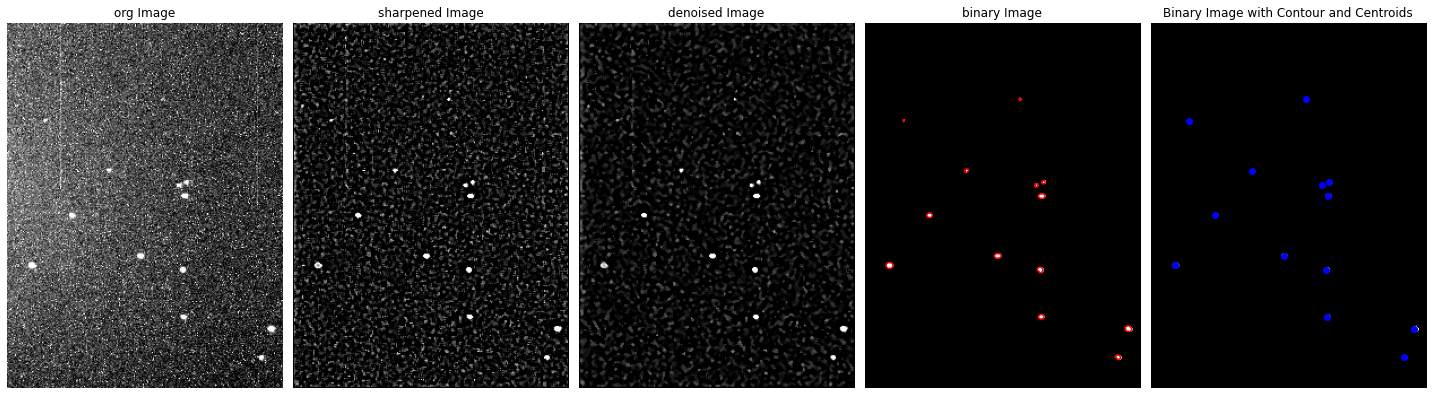

num of detected stars 13
centroids:
 [[137.33333333  67.66666667]
 [ 34.          86.5       ]
 [ 89.875      130.875     ]
 [158.125      141.125     ]
 [151.71428571 144.        ]
 [156.5        153.5       ]
 [ 57.         170.5       ]
 [117.5        206.5       ]
 [ 21.5        215.        ]
 [155.15789474 218.84210526]
 [156.         260.5       ]
 [233.33333333 271.125     ]
 [224.21428571 296.35714286]]
expected:  3


In [36]:
stardetect('input1.txt')

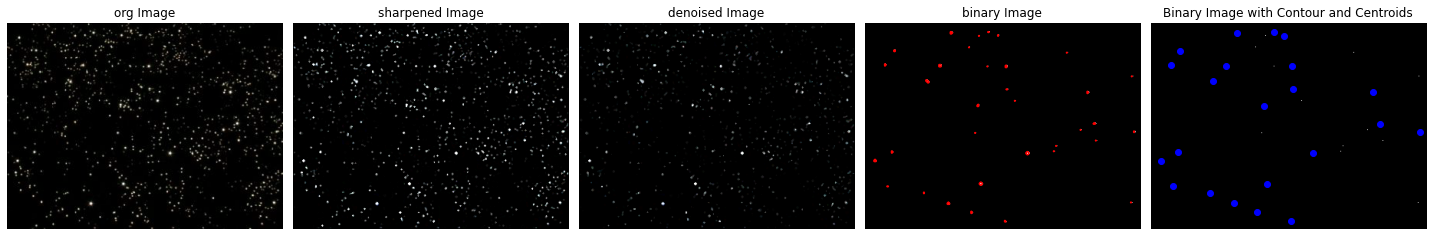

num of detected stars 22
centroids:
 [[112.71428571  13.        ]
 [161.5         12.        ]
 [174.          16.5       ]
 [ 38.5         36.5       ]
 [ 26.25        55.        ]
 [ 98.          56.        ]
 [184.5         57.        ]
 [ 81.5         76.5       ]
 [185.5         87.        ]
 [291.25        91.        ]
 [147.6        108.2       ]
 [300.         131.75      ]
 [352.         142.5       ]
 [ 35.25       169.        ]
 [212.5        170.5       ]
 [ 13.         180.28571429]
 [151.5        210.5       ]
 [ 29.5        214.        ]
 [ 77.         222.5       ]
 [109.         236.28571429]
 [139.25       248.        ]
 [183.33333333 259.66666667]]
expected:  26


In [37]:
stardetect('input.txt')